# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

%matplotlib inline 
sns.set_style('white')

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic 

In [2]:
path = 'D:/ML/Books/Learning_Pandas_russian_translation-1-master/pandas_exercises-master/pandas_exercises-master/Data/train.csv'
data = pd.read_csv(path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

In [3]:
data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

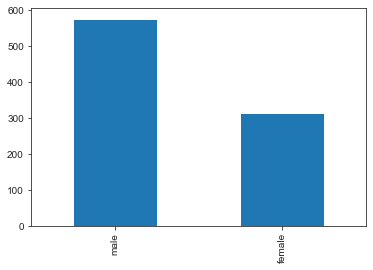

In [70]:
# My Solution 
data['Sex'].value_counts().plot(kind='bar');

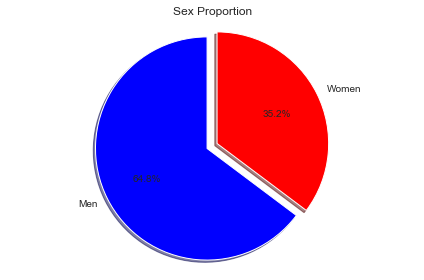

In [83]:
# Author's solution
men = (data['Sex'] == 'male').sum() 
women = (data['Sex'] == 'female').sum() 

proportion = [men,women]

plt.pie(

    proportion,
    labels = ['Men','Women'],
    shadow = True,
    colors = ['blue','red'],
    explode = (0.1,0),
    startangle = 90,
    autopct = '%1.1f%%'
)

plt.axis('equal')
plt.title('Sex Proportion')

plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

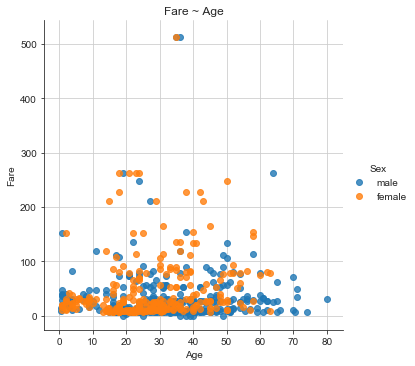

In [96]:
sns.set_style('ticks')
plot = sns.lmplot(x='Age',y='Fare',data=data,hue='Sex',fit_reg=False)
plt.grid(True)
plot.set(title = 'Fare ~ Age')

### Step 7. How many people survived?

342


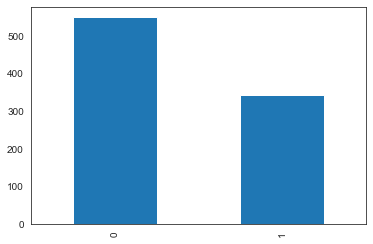

In [19]:
data['Survived'].value_counts().plot(kind='bar');
print(data['Survived'].value_counts()[1])

### Step 8. Create a histogram with the Fare payed

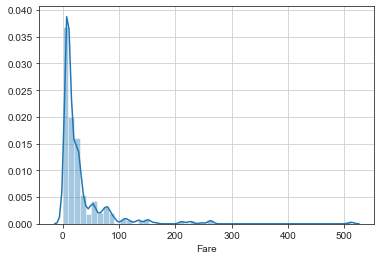

In [97]:
# My solution
sns.set_style('ticks')
plt.grid(True)
sns.distplot(data.Fare);

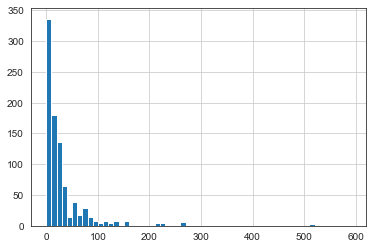

In [104]:
# Author's solution 
fare = data['Fare'].sort_values(ascending=False)

intervals = np.arange(0,600,10)

plt.hist(fare,bins=intervals)
plt.grid(True)
plt.show()

### BONUS: Create your own question and answer it.

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


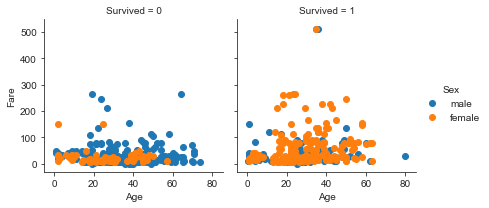

In [34]:
g = sns.FacetGrid(data,col='Survived',hue='Sex')
g.map(plt.scatter,'Age','Fare')
g.add_legend();

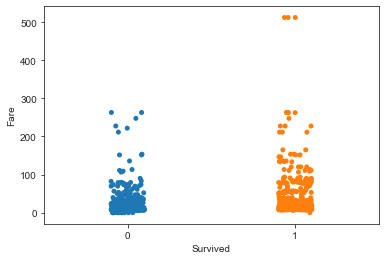

In [53]:
sns.stripplot(x='Survived',y='Fare',data=data,jitter=True);

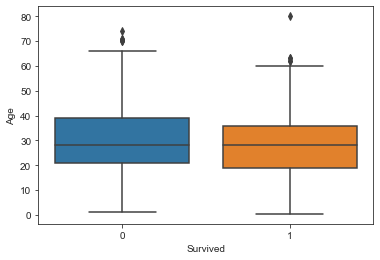

In [68]:
sns.boxplot(x='Survived',y='Age',data=data);